<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment_9Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Assignment 9: Linear Regression
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
# Loading the Linnerud Dataset
# Loading dataset
linnerud = load_linnerud()

# Creating DataFrames
X = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)
y = pd.DataFrame(linnerud.target, columns=linnerud.target_names)

# Displaying first rows
X.head(), y.head()

(   Chins  Situps  Jumps
 0    5.0   162.0   60.0
 1    2.0   110.0   60.0
 2   12.0   101.0  101.0
 3   12.0   105.0   37.0
 4   13.0   155.0   58.0,
    Weight  Waist  Pulse
 0   191.0   36.0   50.0
 1   189.0   37.0   52.0
 2   193.0   38.0   58.0
 3   162.0   35.0   62.0
 4   189.0   35.0   46.0)

In [7]:
# Basic Dataset Information
print("Features shape:", X.shape)
print("Targets shape:", y.shape)

X.info()
y.info()

Features shape: (20, 3)
Targets shape: (20, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chins   20 non-null     float64
 1   Situps  20 non-null     float64
 2   Jumps   20 non-null     float64
dtypes: float64(3)
memory usage: 612.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  20 non-null     float64
 1   Waist   20 non-null     float64
 2   Pulse   20 non-null     float64
dtypes: float64(3)
memory usage: 612.0 bytes


In [8]:
# Checking for Missing Values
print("Missing values in features:")
print(X.isnull().sum())

print("\nMissing values in targets:")
print(y.isnull().sum())

Missing values in features:
Chins     0
Situps    0
Jumps     0
dtype: int64

Missing values in targets:
Weight    0
Waist     0
Pulse     0
dtype: int64


In [9]:
# Descriptive Statistics
X.describe(), y.describe()

(           Chins      Situps      Jumps
 count  20.000000   20.000000   20.00000
 mean    9.450000  145.550000   70.30000
 std     5.286278   62.566575   51.27747
 min     1.000000   50.000000   25.00000
 25%     4.750000  101.000000   39.50000
 50%    11.500000  122.500000   54.00000
 75%    13.250000  210.000000   85.25000
 max    17.000000  251.000000  250.00000,
            Weight      Waist      Pulse
 count   20.000000  20.000000  20.000000
 mean   178.600000  35.400000  56.100000
 std     24.690505   3.201973   7.210373
 min    138.000000  31.000000  46.000000
 25%    160.750000  33.000000  51.500000
 50%    176.000000  35.000000  55.000000
 75%    191.500000  37.000000  60.500000
 max    247.000000  46.000000  74.000000)

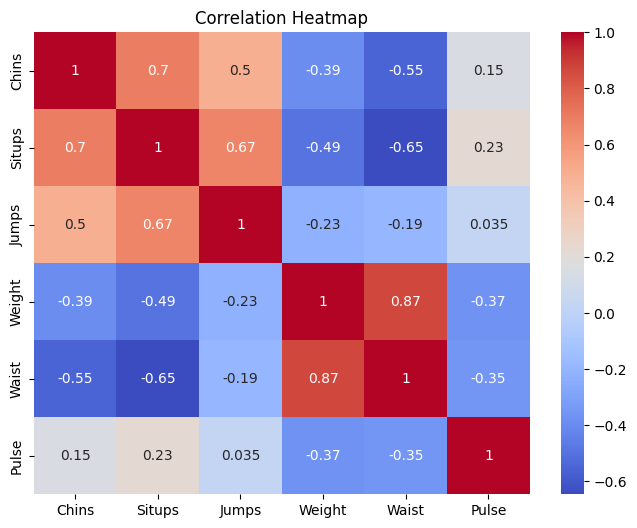

In [12]:
# Exploratory Data Analysis (EDA)
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pd.concat([X, y], axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [13]:
# Train-Test Split (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)

(16, 3) (4, 3)


In [14]:
# Building and Training Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Making Predictions
y_pred = lr_model.predict(X_test)

In [16]:
# Model Evaluation (R Square and RMSE)
for i, target in enumerate(y.columns):
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    print(f"{target} -> R²: {r2:.3f}, RMSE: {rmse:.3f}")

Weight -> R²: -1.243, RMSE: 25.115
Waist -> R²: -0.076, RMSE: 2.138
Pulse -> R²: -2.732, RMSE: 9.062


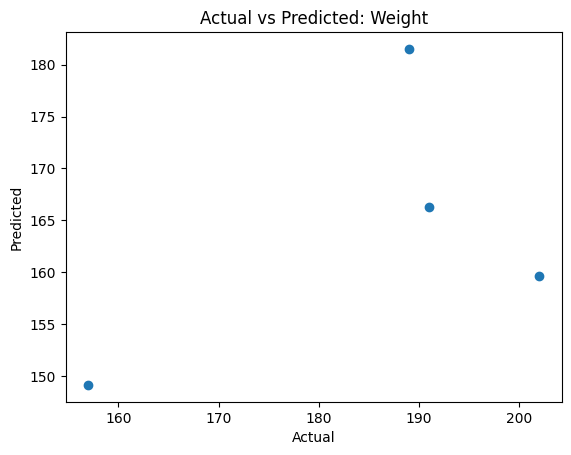

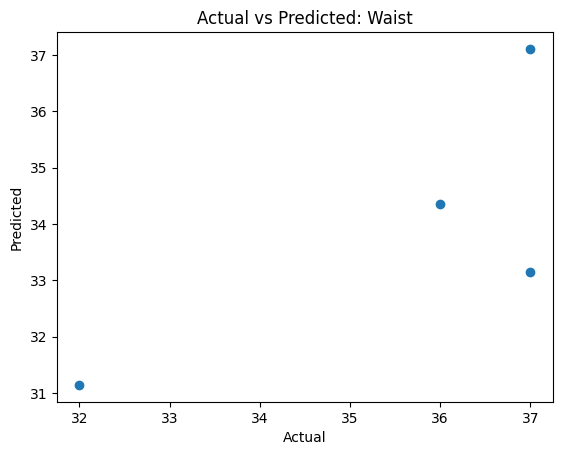

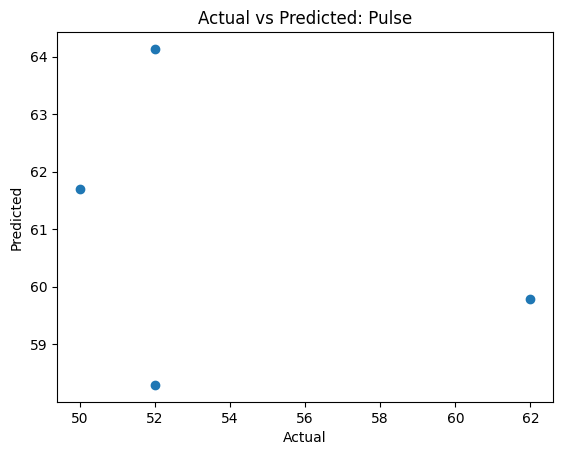

In [17]:
# Actual vs Predicted Plots
for i, target in enumerate(y.columns):
    plt.figure()
    plt.scatter(y_test.iloc[:, i], y_pred[:, i])
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Actual vs Predicted: {target}")
    plt.show()

In [19]:
# Predicting on One New Test Data Point
sample = X_test.iloc[[0]]
prediction = lr_model.predict(sample)

print("Input features:")
print(sample)

print("\nPredicted targets:")
print(pd.DataFrame(prediction, columns=y.columns))

Input features:
   Chins  Situps  Jumps
0    5.0   162.0   60.0

Predicted targets:
       Weight      Waist      Pulse
0  166.299446  34.349313  61.692687


In [20]:
# Improve Performance Using Feature Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [22]:
# Evaluation After Scaling
for i, target in enumerate(y.columns):
    r2 = r2_score(y_test.iloc[:, i], y_pred_scaled[:, i])
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred_scaled[:, i]))
    print(f"{target} (Scaled) -> R²: {r2:.3f}, RMSE: {rmse:.3f}")

Weight (Scaled) -> R²: -1.243, RMSE: 25.115
Waist (Scaled) -> R²: -0.076, RMSE: 2.138
Pulse (Scaled) -> R²: -2.732, RMSE: 9.062


In [23]:
# Lasso Regression Model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

In [24]:
# Lasso Model Evaluation
for i, target in enumerate(y.columns):
    r2 = r2_score(y_test.iloc[:, i], y_pred_lasso[:, i])
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred_lasso[:, i]))
    print(f"{target} (Lasso) -> R²: {r2:.3f}, RMSE: {rmse:.3f}")

Weight (Lasso) -> R²: -1.175, RMSE: 24.729
Waist (Lasso) -> R²: -0.006, RMSE: 2.067
Pulse (Lasso) -> R²: -2.290, RMSE: 8.508
